In [66]:
import numpy as np, matplotlib.pyplot as plt
import os
from scipy import interpolate
from astropy.convolution import convolve_fft, Gaussian1DKernel
from glob import glob

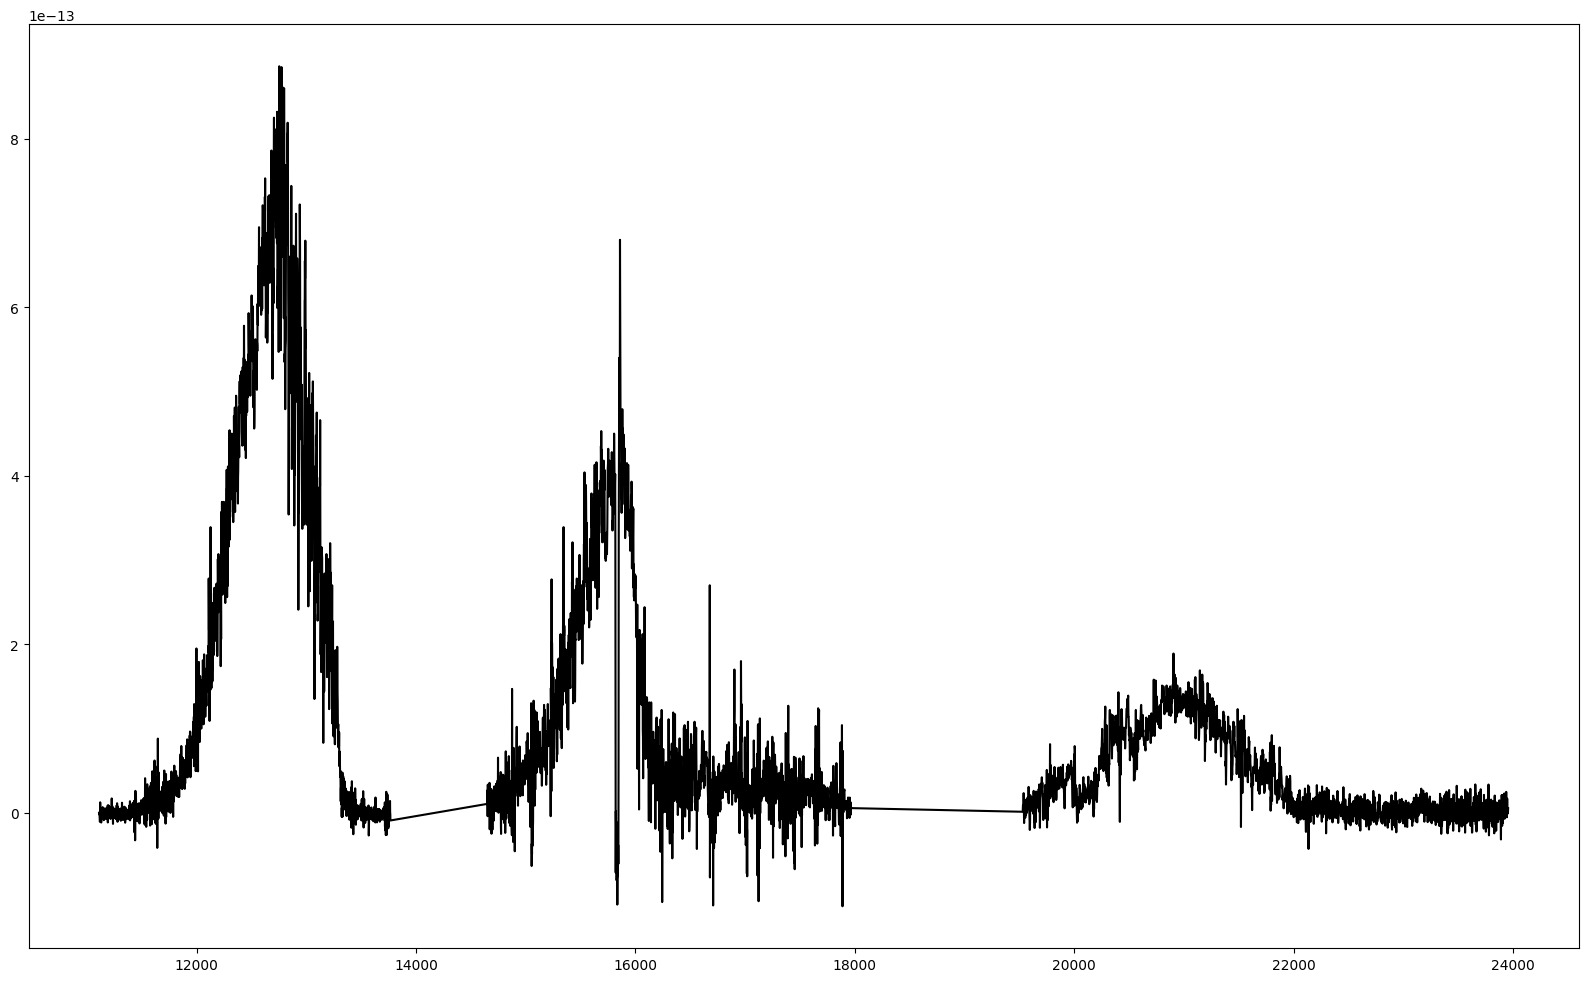

In [67]:
##################################################
## Read in the MOSFIRE data and plot the basics ##
##################################################

msfire = np.loadtxt('Flux_cal_JHK_2M2255-3118_excel.txt')
wave = msfire[:, 0] # Å
wave_um = msfire[:, 0] * 1e-4 # µm
flux = msfire[:, 1]
unc = msfire[:, 2]

plt.figure(figsize = (20, 12))
plt.plot(wave, flux, color = 'black')

* Target distance in light-years: 14.204545454545453 ly
* Target distance in kilometers:  134389204545454.53 km
* Target distance in angstroms:   1.3438920454545454e+27 Å

* Scaling constant (km):          2.7062147816281133e-19
* Scaling constant (Å):           2.7062147816281133e-19

3529.3333333333335


(11110.0, 23955.9)

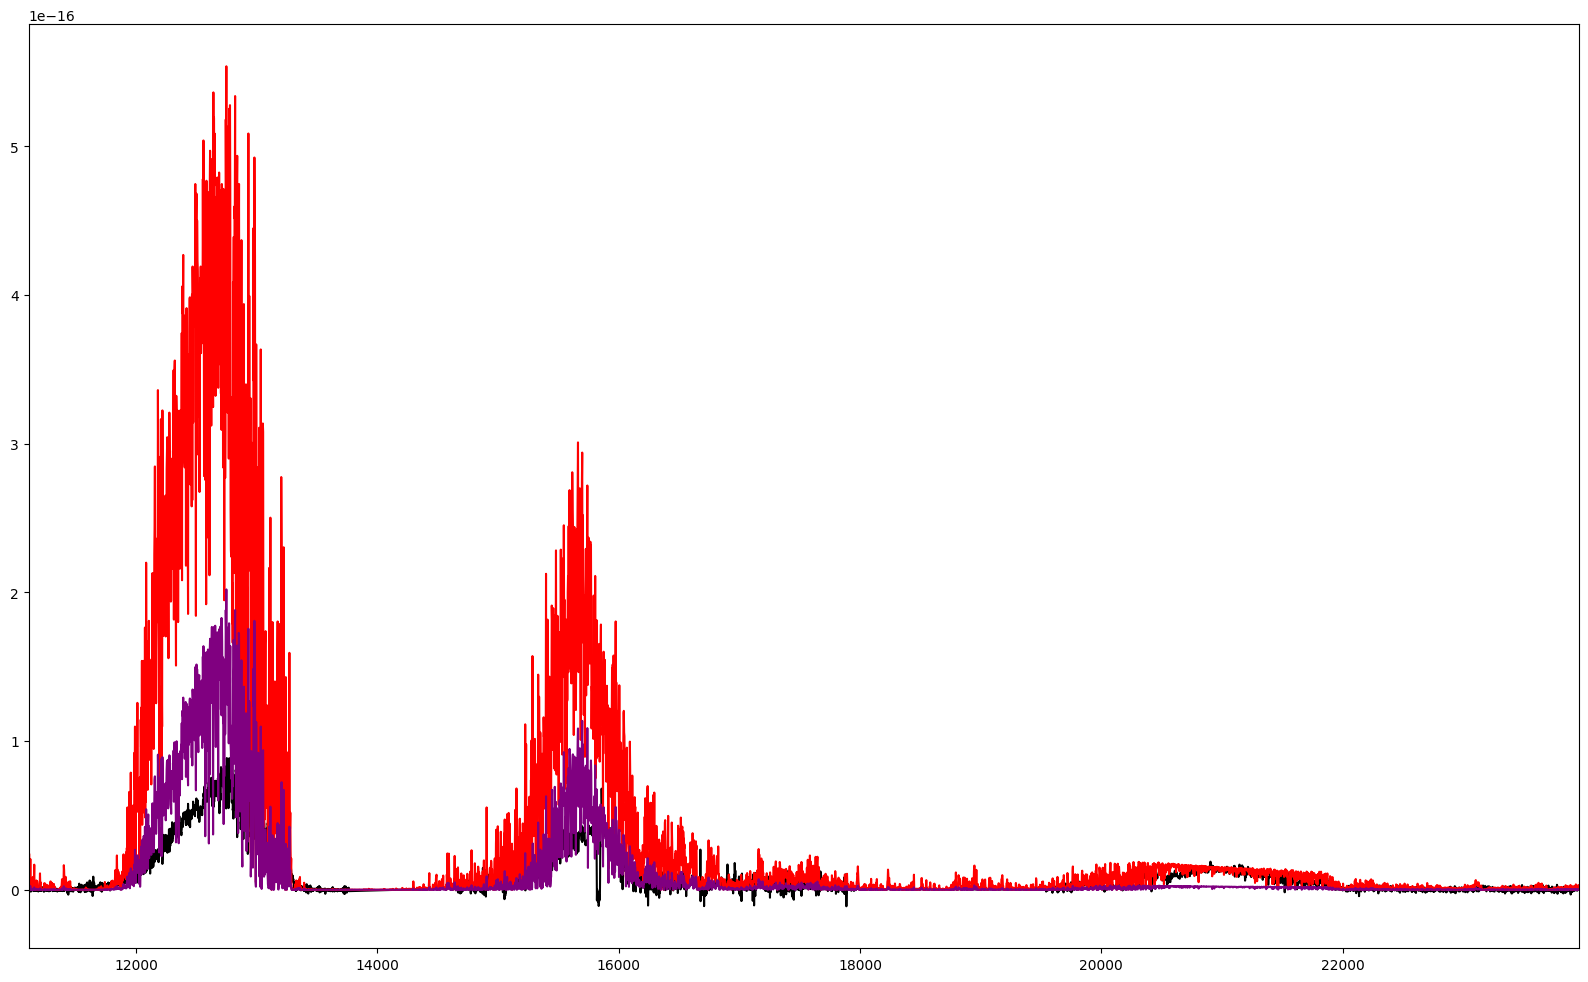

In [68]:
##################################################
## Define the basic variables and file paths    ##
## Create a loop to read in each BT-Settl model ##
##################################################

target = 'WISE J225540.75-311842.0'
target_short = 'WISE J225540'

file_name = '/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118.txt'

msfire_filepath = '/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118.txt'

bt_path = '/Users/bseamons/Documents/Research/models_1717611630/bt-settl_models/'
bt_models = glob(os.path.join(bt_path, '*.7.dat.txt'))

spex_path = '/Users/bseamons/Documents/Research/SpeX_archived_spectra/'
spextra = glob(os.path.join(spex_path, '*.spex.txt'))

atmo_path = '/Users/bseamons/Documents/Research/atmo_models/'
atmo_models = glob(os.path.join(atmo_path, '*.dat'))

parallax = 0.0704 # arcseconds
r_jup_km = 69911 # km
r_jup_A = r_jup_km * 1e13 # Å
d_ly = 1 / parallax # distance to target, LY
d_km = d_ly * 9.461e12 # distance to target, km
d_A = d_km * 1e13 # distance to target, Å
scale_km = (r_jup_km ** 2) / (d_km ** 2) # scale factor (r ** 2 / d ** 2), km
scale_A = (r_jup_A ** 2) / (d_A ** 2) # scale factor, Å

print(f'* Target distance in light-years: {d_ly} ly\n* Target distance in kilometers:  {d_km} km\n* Target distance in angstroms:   {d_A} Å\n')
print(f'* Scaling constant (km):          {scale_km}\n* Scaling constant (Å):           {scale_A}\n')

flux_A = msfire[:, 1] * 1e-4
#flux_A = []
#for i in range(len(flux)):
    #flux_A.append(flux[i] / 10000)

RJ = 3318
RH = 3660
RK = 3610
R_array = np.array([RJ, RH, RK])
R = np.average(R_array)
print(R)

#bt_wave = np.zeros(len(bt_models))
#bt_flux = np.zeros(len(bt_models))
#bt_data = np.zeros((len(bt_models), 51888, 2))
#for i in range(len(bt_models)):
    #mod = np.loadtxt(bt_models[i])
    #bt_wave = mod[:, 0]
    #bt_flux = mod[:, 1]
    #bt_data[i, :, 0] = bt_wave
    #bt_data[i, :, 1] = bt_flux

bt_wave = []
bt_flux = []
for i in range(len(bt_models)):
    file = np.loadtxt(bt_models[i])
    wave_data = []
    flux_data = []
    for j in range(len(file)):
        wave_data.append(file[j][0])
        flux_data.append(file[j][1] * scale_A)
    bt_wave.append(wave_data)
    bt_flux.append(flux_data)

#print(f'* bt_data shape:                  {np.shape(bt_data)}')

plt.figure(figsize = (20, 12))
plt.plot(wave, flux_A, color = 'black')
#plt.plot(bt_wave[0], bt_flux[0], color = 'blue')
plt.plot(bt_wave[10], bt_flux[10], color = 'red')
#plt.plot(bt_wave[20], bt_flux[20], color = 'green')
plt.plot(bt_wave[30], bt_flux[30], color = 'purple')

plt.xlim(wave[0], wave[-1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

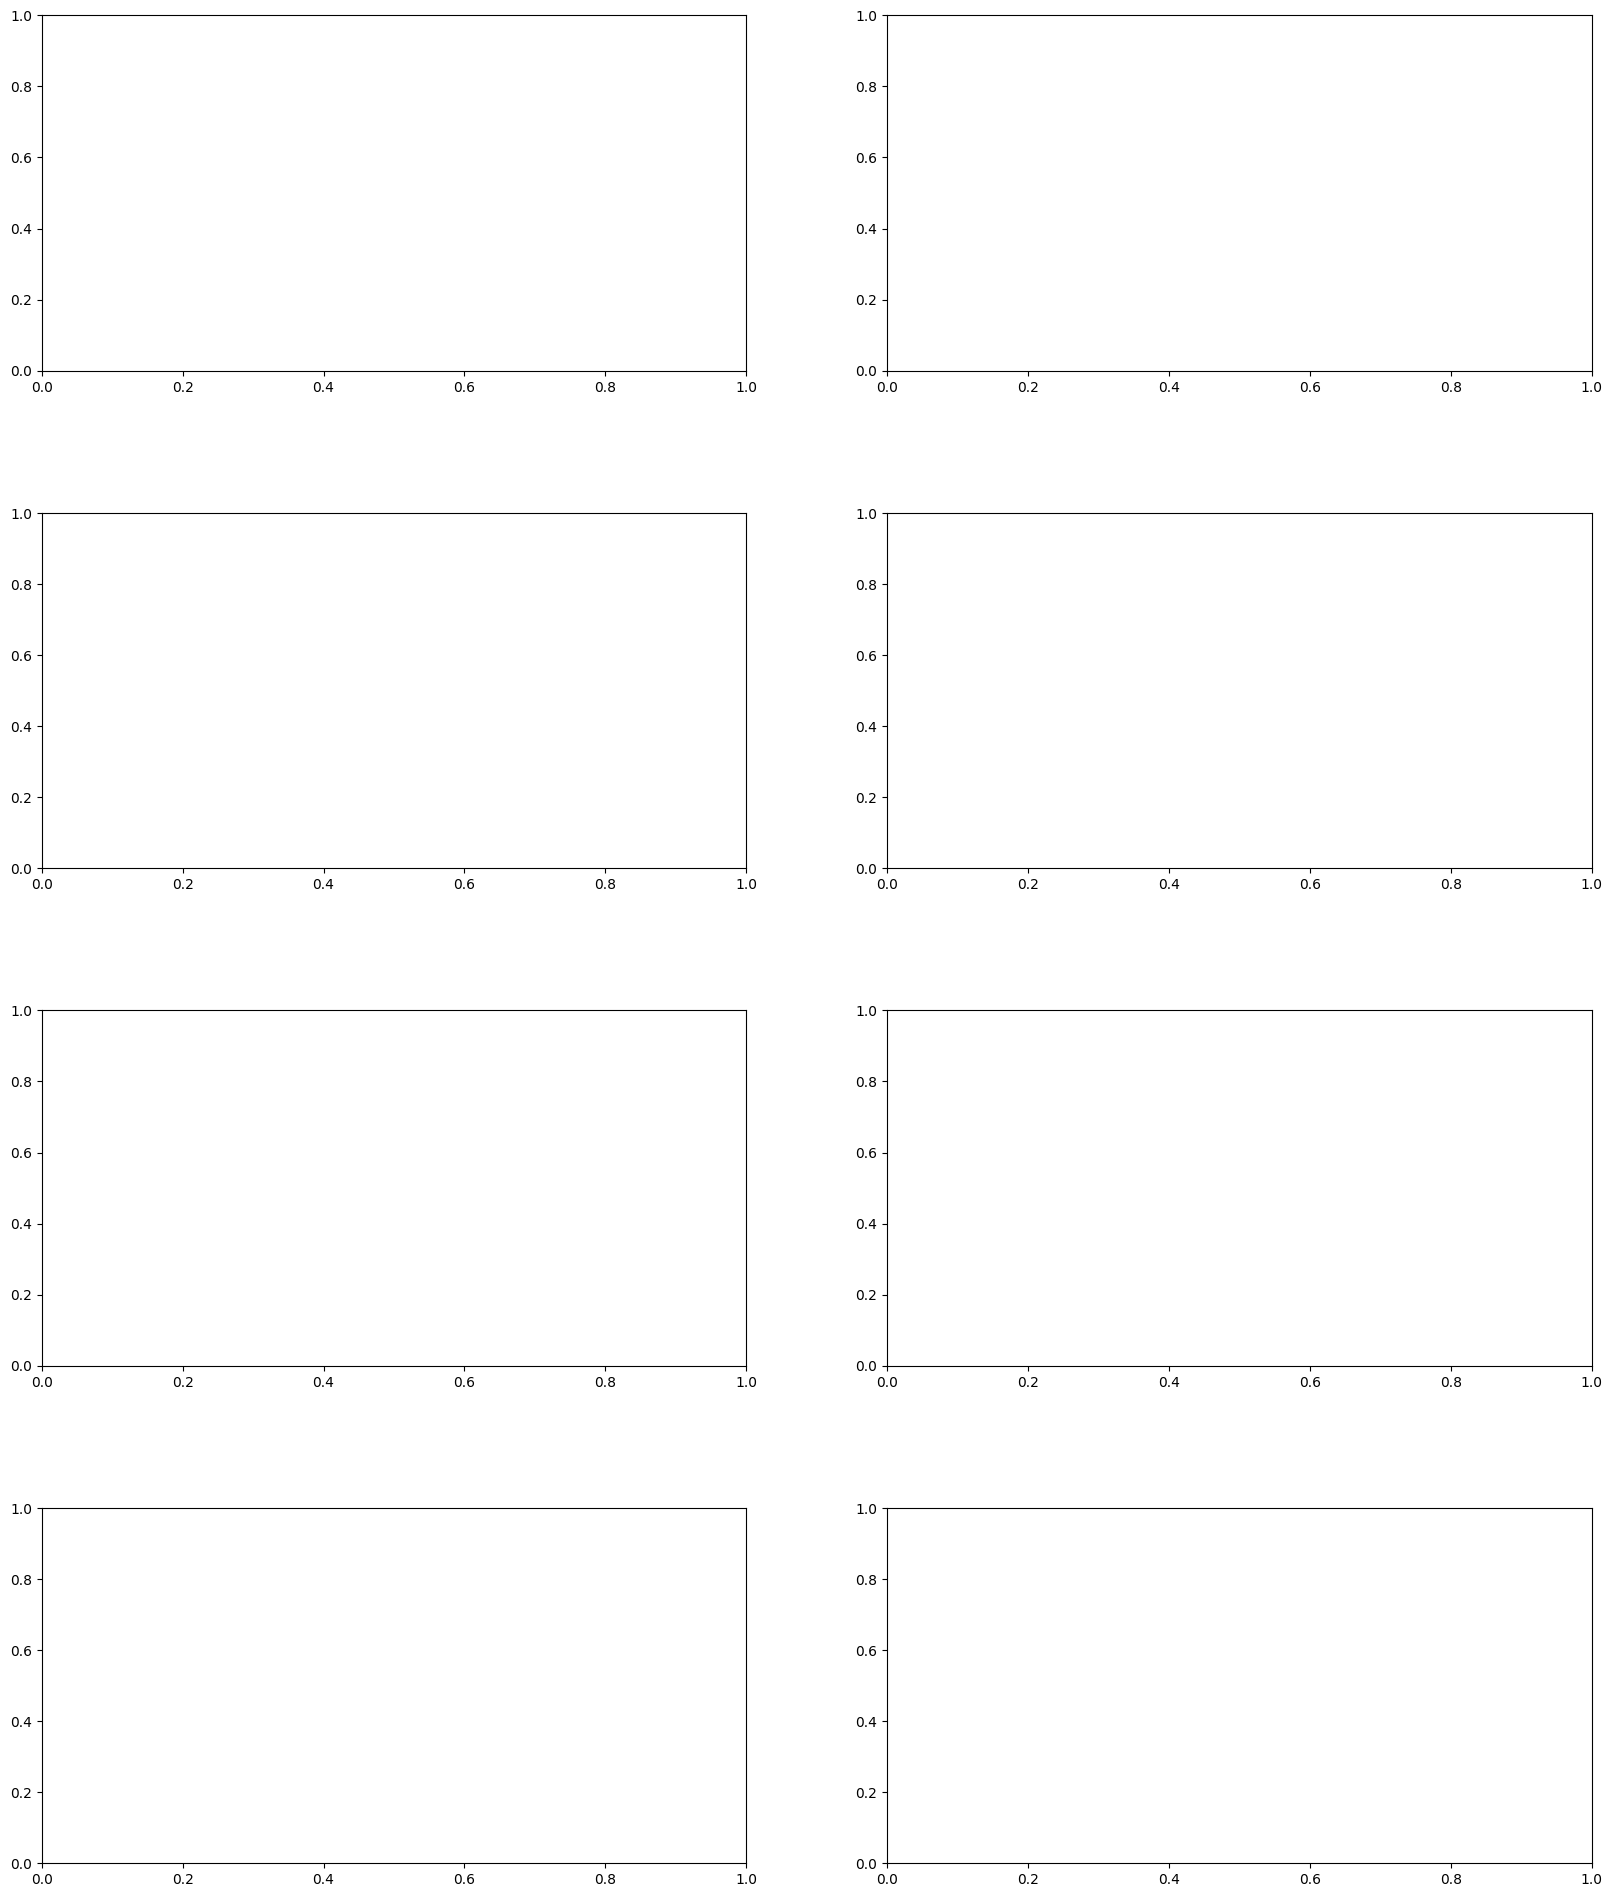

In [69]:
'''
def plot_models(ax, models, index, title):
    colors = ['blue', 'red', 'green', 'gold', 'purple']
    for i, model in enumerate(models):
        ax.plot(model[0], model[1], color=colors[i % len(colors)], linewidth=0.25, label=f'Model {index + i} [logg = {3.5 + 0.5 * i}]')
        ax.scatter(wave, flux, color = 'black', marker = 's', s = 10)
        ax.axvline(x = wave[0], color = 'black', linestyle = '--')
        ax.axvline(x = wave[-1], color = 'black', linestyle = '--')
    ax.set_title(title, fontsize = 15, loc = 'left')
    ax.set_xlabel('Angstrom [A]', fontsize = 15)
    ax.set_ylabel('F$_*$ [erg/cm^2/s/A (for models)]', fontsize = 15)
    ax.tick_params(axis = 'both', labelsize = 10)
    ax.legend(fontsize = 10, loc='upper right')
    #ax.set_xlim(0, 1e5) # extended view
    ax.set_xlim(10500, 24500) # where the observed flux is

fig, axes = plt.subplots(4, 2, figsize=(20, 24))
fig.subplots_adjust(hspace=0.4)

plot_models(axes[0, 0], [mod01, mod02, mod03, mod04], 1, 'BT-Settl Models [400 K]')
plot_models(axes[0, 1], [mod05, mod06, mod07, mod08], 5, 'BT-Settl Models [500 K]')
plot_models(axes[1, 0], [mod09, mod10, mod11, mod12, mod13], 9, 'BT-Settl Models [600 K]')
plot_models(axes[1, 1], [mod14, mod15, mod16, mod17], 14, 'BT-Settl Models [700 K]')
plot_models(axes[2, 0], [mod18, mod19, mod20, mod21, mod22], 18, 'BT-Settl Models [800 K]')
plot_models(axes[2, 1], [mod23, mod24, mod25, mod26, mod27], 23, 'BT-Settl Models [900 K]')
plot_models(axes[3, 0], [mod28, mod29, mod30, mod31], 28, 'BT-Settl Models [1000 K]')
axes[3, 1].axis('off')
plt.show()
'''
def plot_models(ax, models, index, title):
    colors = ['blue', 'red', 'green', 'gold', 'purple']
    for i, model in enumerate(models):
        ax.plot(model[:, 0], model[:, 1] * scale_A, color = colors[i % len(colors)], linewidth = 0.25, label = f'Model {index + i} [logg = {3.5 + 0.5 * i}]')
        #ax.scatter(wave, flux_A, color = 'black', marker = 's', s = 1)
    ax.plot(wave, flux_A, color = 'black', linewidth = 0.25, label = 'MOSFIRE data')
    ax.set_title(title, loc = 'left', fontsize = 15)
    ax.set_xlabel('Wavelength [µm]', fontsize = 15)
    ax.set_ylabel('F$_*$ [erg/cm$^2$/s/Å]', fontsize = 15)
    ax.tick_params(axis = 'both', labelsize = 10)
    ax.legend(fontsize = 10, loc = 'upper right')
    ax.set_xlim(wave[0], wave[-1])

fig, axes = plt.subplots(4, 2, figsize = (20, 24))
fig.subplots_adjust(hspace = 0.4)

plot_models(axes[0, 0], bt_data[:4], 1, 'BT-Settl Models [400 K]')
plot_models(axes[0, 1], bt_data[4:8], 5, 'BT-Settl Models [500 K]')
plot_models(axes[1, 0], bt_data[8:13], 9, 'BT-Settl Models [600 K]')
plot_models(axes[1, 1], bt_data[13:17], 14, 'BT-Settl Models [700 K]')
plot_models(axes[2, 0], bt_data[17:22], 18, 'BT-Settl Models [800 K]')
plot_models(axes[2, 1], bt_data[22:27], 23, 'BT-Settl Models [900 K]')
plot_models(axes[3, 0], bt_data[27:31], 28, 'BT-Settl Models [1000 K]')
#plots(axes[0, 1], range(4, 8), 'BT-Settl Models [500 K]')
#plots(axes[1, 0], range(8, 13), 'BT-Settl Models [600 K]')
#plots(axes[1, 1], range(13, 17), 'BT-Settl Models [700 K]')
#plots(axes[2, 0], range(17, 22), 'BT-Settl Models [800 K]')
#plots(axes[2, 1], range(22, 27), 'BT-Settl Models [900 K]')
#plots(axes[3, 0], range(27, 31), 'BT-Settl Models [1000 K]')
plt.show()

Shape of range_data: (2, 6122)
Shape of low_mod:    (31, 2, 6122)
Minimum C value:         [6.40109879e-20]
Minimum G value:         31627.134866091055
Best fit BT-Settl model: /Users/bseamons/Documents/Research/models_1717611630/bt-settl_models/lte006-3.5-0.0.BT-Settl.7.dat.txt


/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_8778/3352133947.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex = int(where_Gmin[0])


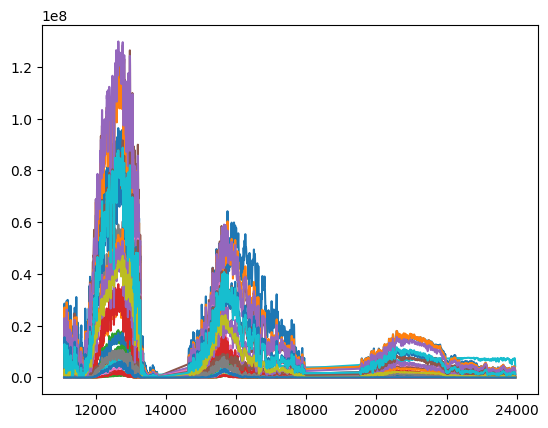

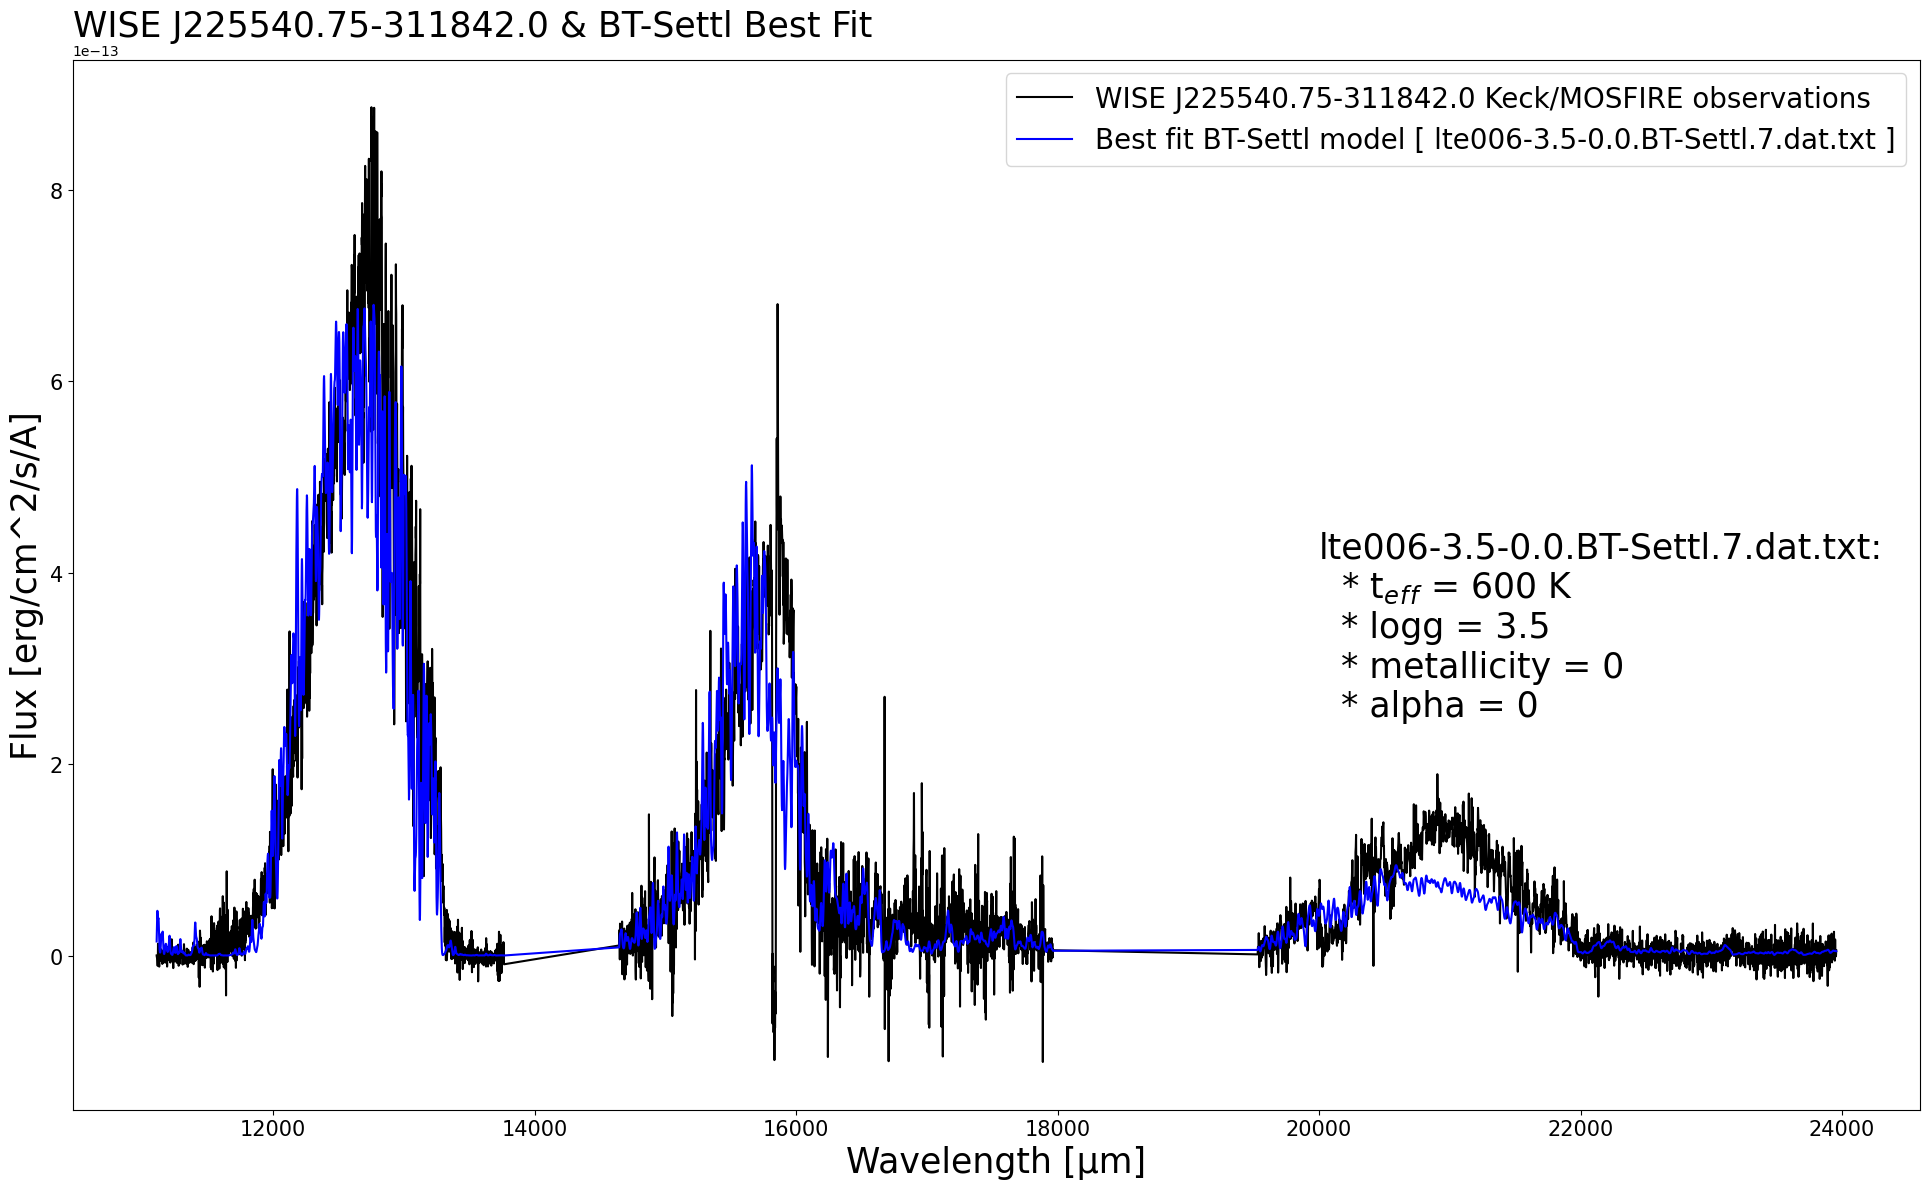

In [95]:
file_name = '/Users/bseamons/Documents/Research/Flux_cal_JHK_2M2255-3118.txt'

bt_path = '/Users/bseamons/Documents/Research/models_1717611630/bt-settl_models/'
bt_models = glob(os.path.join(bt_path, '*.7.dat.txt'))

def convolve_v2(spec, R, sample):
    '''
    This will convolve a model spectrum with a gaussian kernel to the given resolution of the observations [R].
    * Parameters:
        * spec: source spectrum (the object that will be convolved)
        * R: int (the resolution (dL/L) to convolve to)
        * sample: int (oversampling factor for smoothing)
    * Returns:
        * smooth_spec: the convolved spectrum (and possibly the original grid)
    * Notes:
        * Built to work in tandem with bestfit()
        * Needs numpy as np and convolve_fft, Gaussian1DKernel from astropy.convolution
    '''
    ## Define the model wavelength and flux grids
    w_grid = spec[0, :]
    f_grid = spec[1, :]

    ## Define a logarithmic wavelength grid
    w_logmin = np.log10(np.nanmin(w_grid))
    w_logmax = np.log10(np.nanmax(w_grid))
    N = np.size(w_grid) * sample
    w_loggrid = np.logspace(w_logmin, w_logmax, num = N)

    ## Calculate the standard deviation of the Gaussian kernel
    R_grid = (w_loggrid[1: -1] + w_loggrid[0: -2]) / (w_loggrid[1: -1] - w_loggrid[0: -2]) / 2
    sigma = np.median(R_grid) / R
    if sigma < 1:
        sigma = 1

    ## Interpolate the models onto the log grid, convolve them, and interpolate the results onto the original grid
    f_log = np.interp(w_loggrid, w_grid, f_grid)
    gauss = Gaussian1DKernel(stddev = sigma)
    f_conv = convolve_fft(f_log, gauss)
    f_smooth = np.interp(w_grid, w_loggrid, f_conv)
    smooth_spec = np.vstack([w_grid, f_smooth])

    return smooth_spec

def bestfit(obs_path, mod_path, t, res, modelname, var):
    '''
    This function takes the observation file path and the model file path, defines the observation wavelength grid,
    convolves the model wavelengths onto that grid, finds the best fit, and plots the observations and best fit together.
    I wish it was more generally parametized, but C'est la vie.
    * Parameters:
        * obs_path: str - the file path to the observed data (pre-defined)
        * mod_path: str - the file path to the model data (pre-defined)
        * t: str - the given name of the observed target (pre-defined)
        * res: int - the instrument resolution for the models to be convolved to (pre-defined)
        * modelname: int - the given name of the model in use (i.e., BT-Settl, ATMO, etc.)
    * Returns:
        * minC: int - the minimum C value of the fit
        * bestmodel: str - the file path for the best fit model
        * plot: plot - observational data and the best fit model plotted together
    * Notes:
        * Built to work in tandem with convolve_v2()
        * Data files should be shaped as (wavelength, flux, uncertainty (optional))
        * Currently set up to find model files ending in '.dat.txt', though that can be altered with a simple change to
          the 'models' line
        * Needs numpy as np, matplotlib.pyplot as plt, and os, glob from glob
    '''
    ## Read in and sort the observational data, and define the resolution for convolve()
    obs = np.loadtxt(obs_path)
    wave_obs = obs[:, 0]
    flux_obs = obs[:, 1]
    unc_obs = obs[:, 2]

    ## Define the full file path to the models
    models = glob(os.path.join(mod_path, '*.dat.txt'))
    spec = models

    ## Define the C and G grids and loop through the models to interpolate and convolve them
    C = np.zeros(len(models))
    G = np.zeros(len(models))
    low_mod = np.zeros((len(models), 2, (len(wave_obs))))
                           
    for i in range(len(models)):
        data = np.loadtxt(models[i])
        wave = np.where((data[:, 0] > wave_obs[0]) & (data[:, 0] < wave_obs[-1]))

        wl = data[wave, 0][0]
        flux = data[wave, 1][0] * 1e4

        interp_flux = np.interp(wave_obs, wl, flux)
        range_data = np.vstack([wave_obs, interp_flux])
        low_mod[i, :, :] = convolve_v2(range_data, R, 1)
        plt.plot(low_mod[i][0], low_mod[i][1])

        C[i] = (np.nansum((low_mod[i, 1, :] * flux_obs) / unc_obs ** 2)) / (np.nansum(low_mod[i, 1, :] ** 2 / unc_obs ** 2))
        G[i] = np.nansum(((flux_obs - C[i] * low_mod[i, 1, :]) / unc_obs) ** 2)
    print(f'Shape of range_data: {np.shape(range_data)}')
    print(f'Shape of low_mod:    {np.shape(low_mod)}')    
    ## Calculate the minima in C and G
    Gmin = np.min(G)
    where_Gmin = np.where(G == Gmin)
    Cmin = C[where_Gmin]

    ## Index minG to the correct model
    modindex = int(where_Gmin[0])
    bestfit = np.loadtxt(models[modindex])
    bestmodel = models[modindex]

    ## Plot the best fit model with the observational data
    if var == 1:
        print(f'Minimum C value:         {Cmin}')
        print(f'Minimum G value:         {Gmin}')
        print(f'Best fit {modelname} model: {bestmodel}')
        plt.figure(figsize = (20, 12))
        plt.plot(wave_obs, flux_obs, color = 'black', label = target + ' Keck/MOSFIRE observations')
        plt.plot(low_mod[modindex, 0, :], low_mod[modindex, 1, :] * Cmin, color = 'blue', label = f'Best fit {modelname} model [ {bestmodel[69:]} ]')
        plt.title(target + f' & {modelname} Best Fit', loc = 'left', fontsize = 25)
        plt.xlabel('Wavelength [µm]', fontsize = 25)
        plt.ylabel('Flux [erg/cm^2/s/A]', fontsize = 25)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.legend(loc = 'upper right', fontsize = 20, fancybox = True)
        plt.annotate(f'{bestmodel[69:]}:\n  * t$_e$$_f$$_f$ = 600 K\n  * logg = 3.5\n  * metallicity = 0\n  * alpha = 0', (20000, 2.5e-13), fontsize = 25)
        plt.tight_layout()
        #plt.savefig('Best fit BT-Settl model and observations')
    elif var == 2:
        plt.figure(figsize = (20, 12))
        plt.errorbar(wave_obs, flux_obs, yerr = unc, color = 'black', ecolor = 'red', marker = 's', markersize = 3, linewidth = 1, fmt = '.')
        plt.title(target + ' Observations and Error', loc = 'left', fontsize = 25)
        plt.xlabel('Wavelength [µm]', fontsize = 25)
        plt.ylabel('Flux [erg/cm^2/s/A]', fontsize = 25)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.tight_layout()
        #plt.savefig('Observations withe error')
    else:
        print("Please enter the needed input for 'var': 1 for observations vs. model or 2 for observations with error.")

    return

bestfit(file_name, bt_path, target, R, 'BT-Settl', 1) 